In [1]:
import pandas as pd
import datetime
import os
import re
import flair
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates


In [2]:
cd = os.getcwd()
processed_data_directory_path = "/".join(cd.split("/")[:-1]) + "/data/processed/"

In [3]:
clean_df = pd.read_csv(processed_data_directory_path + "cleaned_data.csv")
clean_df = clean_df.drop(columns=["Unnamed: 0"])

# EDA

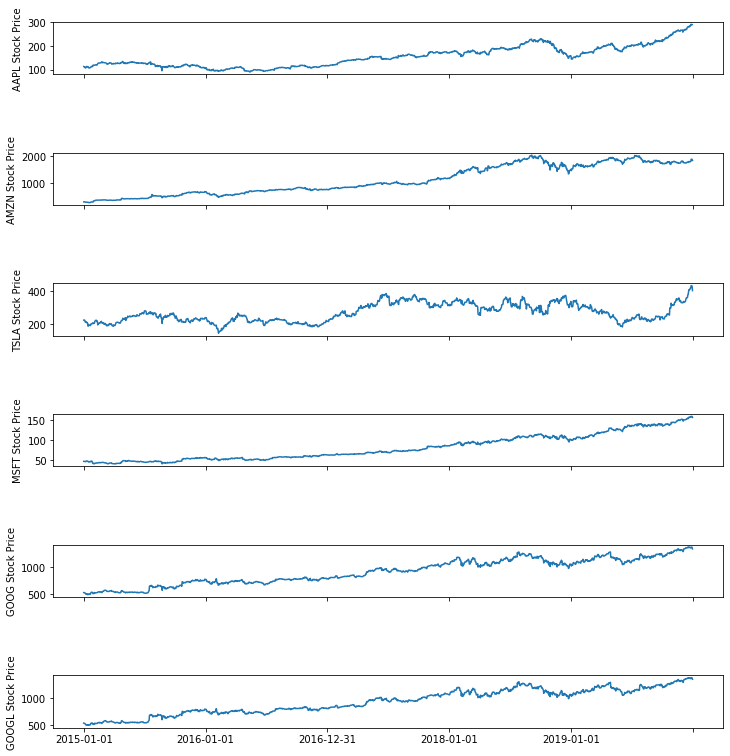

In [4]:
fig, axes = plt.subplots(6, 1, sharex=True)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
fig.set_size_inches(12, 10)

for i, ticker in enumerate(clean_df["ticker_symbol"].unique()):

    open_values = clean_df.loc[clean_df["ticker_symbol"] == ticker]["open_value"]
    day_values = clean_df.loc[clean_df["ticker_symbol"] == ticker]["day_date"]
    
    axes[i].plot(day_values, open_values)  
    axes[i].xaxis.set_major_locator(mdates.YearLocator())   #to get a tick every 15 minutes
#     axes[i].set_ylim(0, 2000)
    axes[i].set_ylabel("{} Stock Price".format(ticker))
    
plt.show()


In [5]:
open_value_data = [clean_df.loc[clean_df["ticker_symbol"] == ticker]["open_value"] for ticker in clean_df["ticker_symbol"].unique()]
labels = list(clean_df["ticker_symbol"].unique())

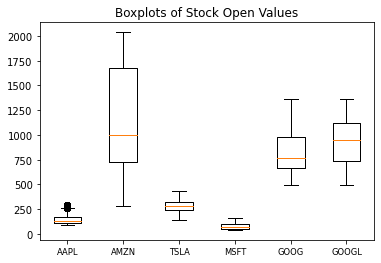

In [6]:
fig, ax = plt.subplots()
ax.set_title('Boxplots of Stock Open Values')
ax.boxplot(open_value_data)
ranges = [i for i in range(1, 7)]
plt.xticks(ranges, labels, size='small')

plt.show()

# Sentiment Classification

In [7]:
sentiment_model = flair.models.TextClassifier.load('en-sentiment')

2021-07-09 11:00:08,954 loading file /Users/davidmpeletz/.flair/models/sentiment-en-mix-distillbert_4.pt


In [8]:
def clean_tweet(tweet):
    whitespace = re.compile(r"\s+")
    web_address = re.compile(r"(?i)http(s):\/\/[a-z0-9.~_\-\/]+")
    # tesla = re.compile(r"(?i)@Tesla(?=\b)")
    user = re.compile(r"(?i)@[a-z0-9_]+")

    # we then use the sub method to replace anything matching
#     tweet = ex_sentence
    tweet = whitespace.sub(' ', tweet)
    tweet = web_address.sub('', tweet)
#     tweet = tesla.sub('Tesla', tweet)
    tweet = user.sub('', tweet)
    
    return tweet


def predict_sentiment(input_tweet):
    sentence = flair.data.Sentence(input_tweet)
    sentiment_model.predict(sentence)
#     return sentence.labels[0].value
    return sentence.labels[0]

def get_sentiment_score(input_tweet):
    sentence = flair.data.Sentence(input_tweet)
    sentiment_model.predict(sentence)
    return sentence.labels[0].score



In [9]:
# full_tweet_df = pd.read_csv(processed_data_directory_path + "processed_stock_tweet_data.csv")
# full_tweet_df = full_tweet_df.drop(columns=["Unnamed: 0"])

# test_df = full_tweet_df[:10]

# test_df["clean_tweet"] = test_df["body"].apply(clean_tweet)

# test_df["sentiment"] = test_df["clean_tweet"].apply(predict_sentiment)

# test_df["sentiment_score"] = test_df["clean_tweet"].apply(get_sentiment_score)

In [10]:
# test_df